# CMSE 202 Project

# Diamonds

Group 09: Tech 03

Members: Samantha Howard, Matthew Guo, Grayson Miller, Abram Anderson, Josh Hedberg

Data set advailable at: https://www.kaggle.com/shivam2503/diamonds

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
#from sklearn.metrics import plot_confusion_matrix
import time
%matplotlib inline

# Data and Cleaning

In [3]:
diamond = pd.read_csv("diamonds.csv")
diamond.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
diamond.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
diamond = diamond.drop('Unnamed: 0', axis = 1)
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
diamond_sorted = diamond.sort_values(by = ['price'])
diamond_sorted

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
27745,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11
27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04


# Data Exploration

In [7]:
np.unique(diamond['color']) #according to the dataset, D is the 'best' color and J is the 'worst'
colors = diamond['color'].replace(['D','E','F','G','H','I','J'], [0,1,2,3,4,5,6]) #replaces the colors with numbers to differentiate them in graphs

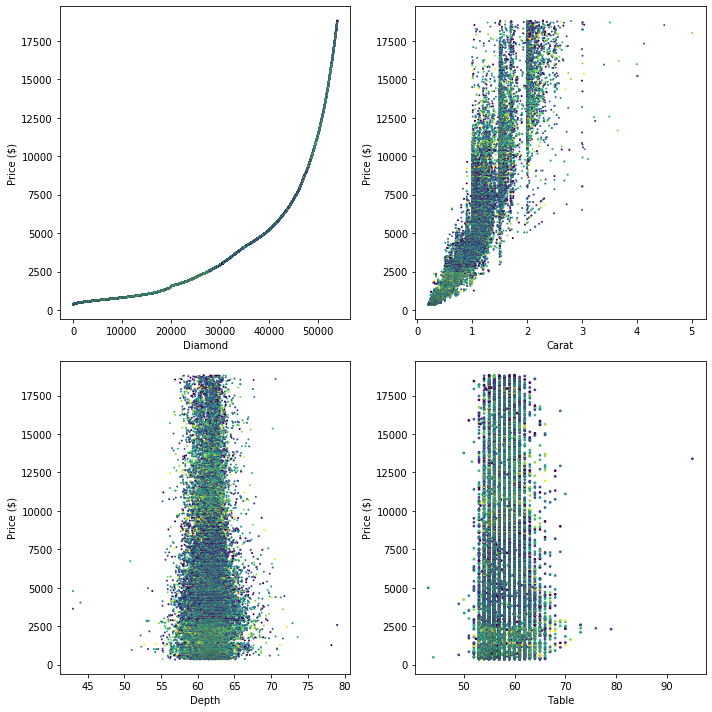

In [8]:
plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
plt.scatter(np.arange(53940), diamond_sorted['price'], c= colors, s=1)
plt.xlabel('Diamond')
plt.ylabel('Price ($)')

plt.subplot(2,2,2)
plt.scatter(diamond_sorted['carat'], diamond_sorted['price'], c= colors, s=1)
plt.xlabel('Carat')
plt.ylabel('Price ($)')

plt.subplot(2,2,3)
plt.scatter(diamond_sorted['depth'], diamond_sorted['price'], c= colors, s=1)
plt.xlabel('Depth')
plt.ylabel('Price ($)')

plt.subplot(2,2,4)
plt.scatter(diamond_sorted['table'], diamond_sorted['price'], c= colors, s=3)
plt.xlabel('Table')
plt.ylabel('Price ($)')
plt.tight_layout()


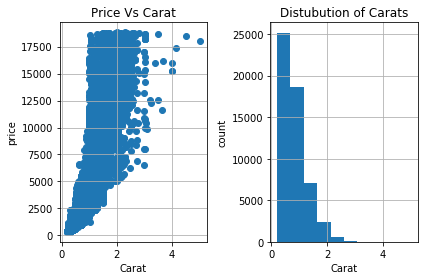

In [9]:
plt.subplot(1,2,1)
plt.scatter(diamond['carat'],diamond['price'])
plt.grid()
plt.xlabel('Carat')
plt.ylabel('price')
plt.title('Price Vs Carat')

plt.subplot(1,2,2)
plt.hist(diamond['carat'])
plt.title('Distubution of Carats')
plt.xlabel('Carat')
plt.ylabel('count')
plt.grid()
plt.tight_layout()

# Model Development and Testing

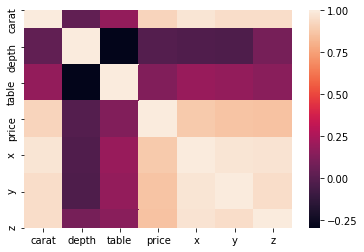

In [10]:
##Josh's Notebook (Cell 4 of )
sorted_corr = diamond_sorted.corr()
sns.heatmap(sorted_corr)

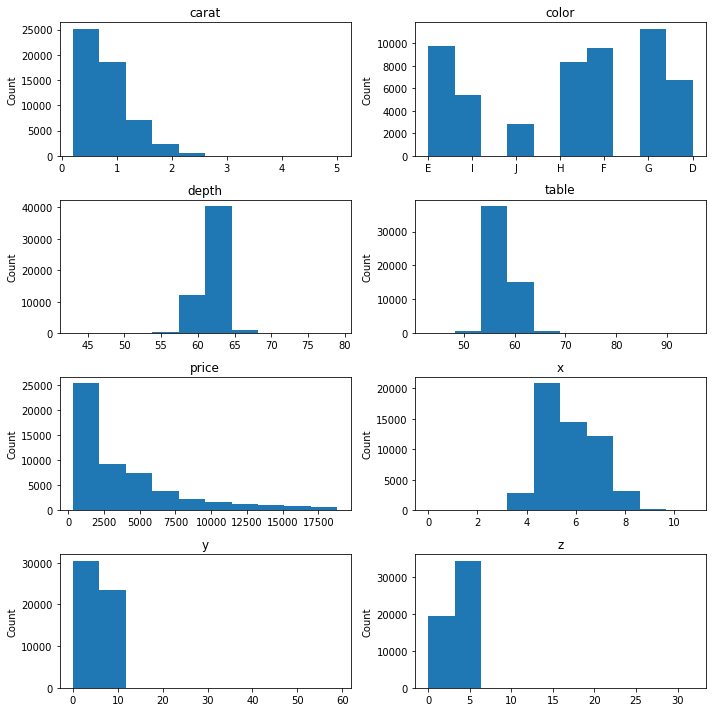

In [11]:
##Josh's Notebook (Cell 6 of )
fig, axs = plt.subplots(4, 2, figsize = (10,10))
axs[0, 0].hist(diamond_sorted['carat'])
axs[0, 0].set_title('carat')

axs[0, 1].hist(diamond_sorted['color'])
axs[0, 1].set_title('color')

axs[1, 0].hist(diamond_sorted['depth'])
axs[1, 0].set_title('depth')

axs[1, 1].hist(diamond_sorted['table'])
axs[1, 1].set_title('table')

axs[2, 0].hist(diamond_sorted['price'])
axs[2, 0].set_title('price')

axs[2, 1].hist(diamond_sorted['x'])
axs[2, 1].set_title('x')

axs[3, 0].hist(diamond_sorted['y'])
axs[3, 0].set_title('y')

axs[3, 1].hist(diamond_sorted['z'])
axs[3, 1].set_title('z')

for ax in axs.flat:
    ax.set(ylabel='Count')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()
    
plt.tight_layout()

In [12]:
##Josh's Notebook (Cell 3 of )
import seaborn as sns

heat_df = pd.DataFrame(features)
features_corr = heat_df.corr()
sns.heatmap(features_corr)

diamond_sorted = diamond_sorted.drop(['cut','clarity'], axis = 1)

NameError: name 'features' is not defined

Normal Model

In [13]:
##Josh's Notebook (Cell 5 of )
import statsmodels.api as sm

model = sm.OLS(diamond_sorted['table'], diamond_sorted.iloc[:, [0,1,2,3,4,5,6,7]])
results = model.fit()
print(results.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [31]:
import warnings
warnings.filterwarnings("ignore")

diamond_sorted['color'].replace(['D','E','F','G','H','I','J'], [0,1,2,3,4,5,6], inplace=True)
reduced_data = diamond_sorted.iloc[::3]
reduced_data['price'] = np.where(reduced_data['price'].between(0,2500), 0,reduced_data['price'])
reduced_data['price'] = np.where(reduced_data['price'].between(2501,5000), 1,reduced_data['price'])
reduced_data['price'] = np.where(reduced_data['price'].between(5001,7500), 2,reduced_data['price'])
reduced_data['price'] = np.where(reduced_data['price'].between(7501,10000), 3,reduced_data['price'])
reduced_data['price'] = np.where(reduced_data['price'].between(10001,12500), 4,reduced_data['price'])
reduced_data['price'] = np.where(reduced_data['price'].between(12501,15000), 5,reduced_data['price'])
reduced_data['price'] = np.where(reduced_data['price'].between(15001,17500), 6,reduced_data['price'])
reduced_data['price'] = np.where(reduced_data['price'].between(17501,20000), 7,reduced_data['price'])
reduced_data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,1,SI2,61.5,55.0,0,3.95,3.98,2.43
3,0.29,Premium,5,VS2,62.4,58.0,0,4.20,4.23,2.63
6,0.24,Very Good,5,VVS1,62.3,57.0,0,3.95,3.98,2.47
9,0.23,Very Good,4,VS1,59.4,61.0,0,4.00,4.05,2.39
12,0.22,Premium,2,SI1,60.4,61.0,0,3.88,3.84,2.33
...,...,...,...,...,...,...,...,...,...,...
27735,1.60,Ideal,2,VS1,62.0,56.0,7,7.47,7.52,4.65
27738,2.05,Ideal,3,SI1,61.9,57.0,7,8.10,8.16,5.03
27741,2.15,Ideal,3,SI2,62.6,54.0,7,8.29,8.35,5.21
27744,2.29,Premium,5,SI1,61.8,59.0,7,8.52,8.45,5.24


In [33]:
features = reduced_data.drop((['cut','clarity']),axis = 1)
scaler = StandardScaler()
features = scaler.fit_transform(features)
print(features)
labels = reduced_data['price']
print(labels)

train_features, test_features, train_labels, test_labels = train_test_split(features,labels,test_size = .25)

[[-1.20267804 -0.93130518 -0.16698259 ... -1.59008692 -1.55389575
  -1.59553295]
 [-1.07539716  1.41761534  0.46164953 ... -1.36677517 -1.33241744
  -1.30729579]
 [-1.18146456  1.41761534  0.39180151 ... -1.59008692 -1.55389575
  -1.53788552]
 ...
 [ 2.87031001  0.24315508  0.60134555 ...  2.28660493  2.31754507
   2.41096357]
 [ 3.16729872  1.41761534  0.04256145 ...  2.49205174  2.40613639
   2.45419915]
 [ 1.51264732  0.24315508 -0.02728657 ...  1.46481772  1.48478663
   1.4741928 ]]
0        0
3        0
6        0
9        0
12       0
        ..
27735    7
27738    7
27741    7
27744    7
27747    7
Name: price, Length: 17980, dtype: int64


SVM Model

In [34]:
y = diamond[['price']].values 
x = diamond[['carat','depth','table','x','y','z']].values 

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
x = StandardScaler().fit_transform(x)

clf = SVC(C=10,gamma=.001, kernel='rbf').fit(train_features,train_labels) 
print(clf.score(test_features,test_labels))

Lengths: x_train 40455 y_train 40455
Lengths: x_test 13485 y_test 13485
0.9997775305895439


KNN Model

In [37]:
knn = KNeighborsClassifier(n_neighbors=100)
fit = knn.fit(train_features,train_labels)
pred = fit.predict(test_features)
metrics.accuracy_score(test_labels,pred)

0.9245828698553948

Gridsearch

In [47]:
param_grid = {'C': [1,10,100,1000],
              'gamma': [1*10**-4,1*10**-3,.01,.1],
              'kernel':['linear','rbf'] }
clf = GridSearchCV(SVC(class_weight='balanced'), param_grid)

clf = clf.fit(train_features, train_labels)
print("Best estimator for linear found by grid search:")
print(clf.best_estimator_)

Best estimator for linear found by grid search:
SVC(C=100, class_weight='balanced', gamma=0.001)


In [49]:
a_list = list(range(1, 100))
knn=KNeighborsClassifier()
pa={'n_neighbors':a_list}

gridsearch=GridSearchCV(knn,pa,cv=5)

gridsearch.fit(train_features, train_labels)
print(gridsearch.best_params_)


{'n_neighbors': 1}


PCA

Training set changed from a size of:  (13485, 8)  to:  (13485, 4)
Testing set changed from a size of:  (4495, 8)  to:  (4495, 4)
0.8665183537263627
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2350
           1       0.90      0.87      0.88       959
           2       0.73      0.77      0.75       530
           3       0.56      0.54      0.55       254
           4       0.49      0.50      0.50       168
           5       0.54      0.48      0.51       127
           6       0.44      0.64      0.52        75
           7       0.45      0.31      0.37        32

    accuracy                           0.87      4495
   macro avg       0.64      0.64      0.63      4495
weighted avg       0.87      0.87      0.87      4495

[[2312   38    0    0    0    0    0    0]
 [  37  834   85    3    0    0    0    0]
 [   0   55  410   54   10    1    0    0]
 [   0    1   61  136   48    6    2    0]
 [   0    0    5   46   84   

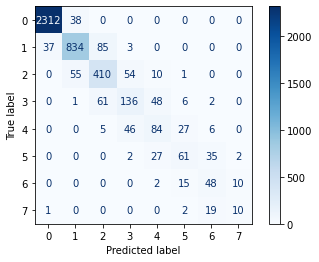

In [46]:
pca = PCA(n_components=4)
_ = pca.fit(train_features)
pca_train_features = pca.transform(train_features)
pca_test_features = pca.transform(test_features)

print("Training set changed from a size of: ", train_features.shape, ' to: ', pca_train_features.shape)
print("Testing set changed from a size of: ", test_features.shape, ' to: ', pca_test_features.shape)

my_model = SVC(C = 1000,gamma = .01, kernel = 'rbf')
my_model = my_model.fit(pca_train_features,train_labels)
print(my_model.score(pca_test_features,test_labels))
pred = my_model.predict(pca_test_features)
print(classification_report(test_labels,pred))
print(confusion_matrix(test_labels,pred))
plot_confusion_matrix(my_model, pca_test_features, test_labels,display_labels=[0,1,2,3,4,5,6,7],cmap=plt.cm.Blues)

# Presentation of Results

# Reproducibility